<a href="https://colab.research.google.com/github/hgv004/Machine-Learning/blob/main/Case_study_Telecom_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

# Load the dataset

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Projects/Data/Python_Case_Studytop (1).csv')
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [3]:
mylist=[]
for cl in df.columns:
  cl=cl.lower().replace(' ','_')
  mylist.append(cl)
df.columns=mylist

In [4]:
df.isnull().sum()

state                     0
account_length            0
area_code                 0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

In [5]:
df.describe()

account_length    area_code  number_vmail_messages  total_day_minutes  \
count     2666.000000  2666.000000            2666.000000         2666.00000   
mean       100.620405   437.438860               8.021755          179.48162   
std         39.563974    42.521018              13.612277           54.21035   
min          1.000000   408.000000               0.000000            0.00000   
25%         73.000000   408.000000               0.000000          143.40000   
50%        100.000000   415.000000               0.000000          179.95000   
75%        127.000000   510.000000              19.000000          215.90000   
max        243.000000   510.000000              50.000000          350.80000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      2666.000000       2666.000000        2666.000000      2666.000000   
mean        100.310203         30.512404         200.386159       100.023631   
std          19.988162          9.215733          50.951515        20.161445   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.380000         165.300000        87.000000   
50%         101.000000         30.590000         200.900000       100.000000   
75%         114.000000         36.700000         235.100000       114.000000   
max         160.000000         59.640000         363.700000       170.000000   

       total_eve_charge  total_night_minutes  total_night_calls  \
count       2666.000000          2666.000000        2666.000000   
mean          17.033072           201.168942         100.106152   
std            4.330864            50.780323          19.418459   
min            0.000000            43.700000          33.000000   
25%           14.050000           166.925000          87.000000   
50%           17.080000           201.150000         100.000000   
75%           19.980000           236.475000         113.000000   
max           30.910000           395.000000         166.000000   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count         2666.000000         2666.000000       2666.000000   
mean             9.052689           10.237022          4.467367   
std              2.285120            2.788349          2.456195   
min              1.970000            0.000000          0.000000   
25%              7.512500            8.500000          3.000000   
50%              9.050000           10.200000          4.000000   
75%             10.640000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total_intl_charge  customer_service_calls  
count        2666.000000             2666.000000  
mean            2.764490                1.562641  
std             0.752812                1.311236  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.750000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [6]:
df.dtypes

state                      object
account_length              int64
area_code                   int64
international_plan         object
voice_mail_plan            object
number_vmail_messages       int64
total_day_minutes         float64
total_day_calls             int64
total_day_charge          float64
total_eve_minutes         float64
total_eve_calls             int64
total_eve_charge          float64
total_night_minutes       float64
total_night_calls           int64
total_night_charge        float64
total_intl_minutes        float64
total_intl_calls            int64
total_intl_charge         float64
customer_service_calls      int64
churn                        bool
dtype: object

In [7]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')

# EDA

In [8]:
def cpt(v):
  sns.countplot(df[v],hue=df['churn'])

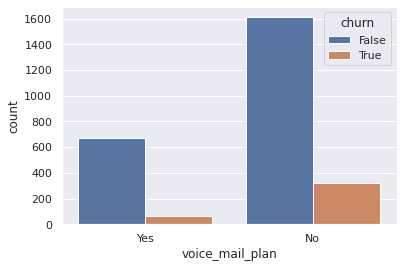

In [9]:
cpt('voice_mail_plan')

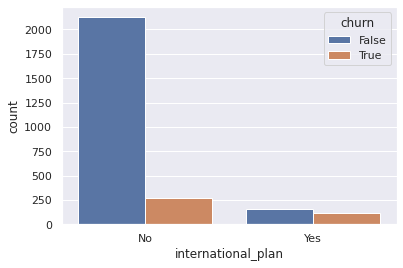

In [10]:
cpt('international_plan')

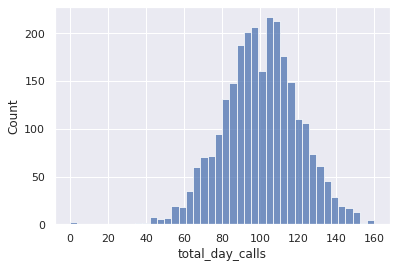

In [11]:
sns.histplot(df['total_day_calls'])

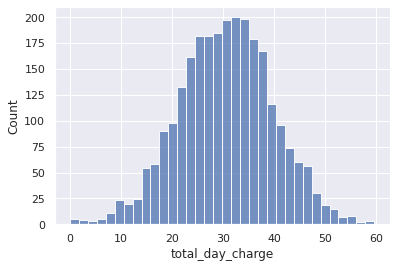

In [12]:
sns.histplot(df['total_day_charge'])

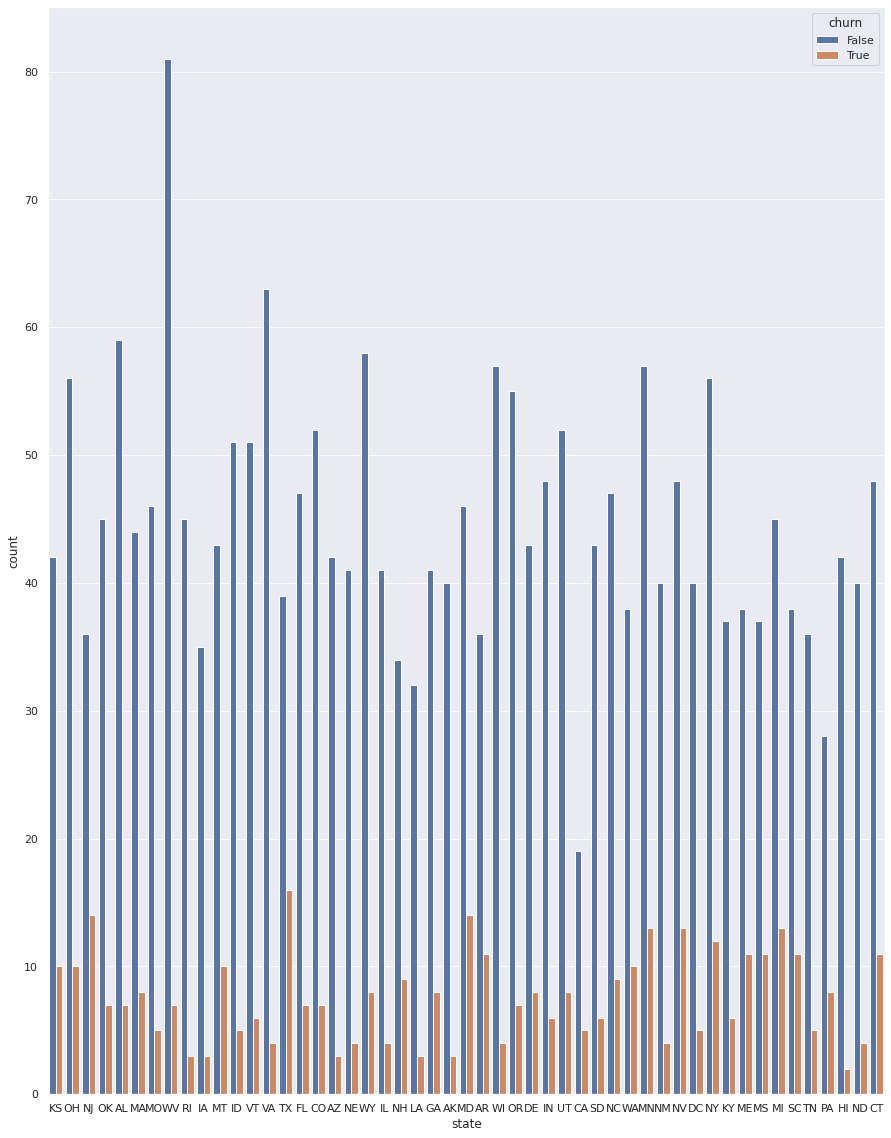

In [13]:
plt.figure(figsize=(15,20))
sns.countplot(df.state,hue=df['churn'])

In [14]:
df.head()

state  account_length  area_code international_plan voice_mail_plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer_service_calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [15]:
df.area_code.unique()

array([415, 408, 510])

In [16]:
df.shape

(2666, 20)

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['churn']=le.fit_transform(df['churn'])

In [18]:
pc=df.groupby(['churn'])['state'].count().reset_index()
pc

churn  state
0      0   2278
1      1    388

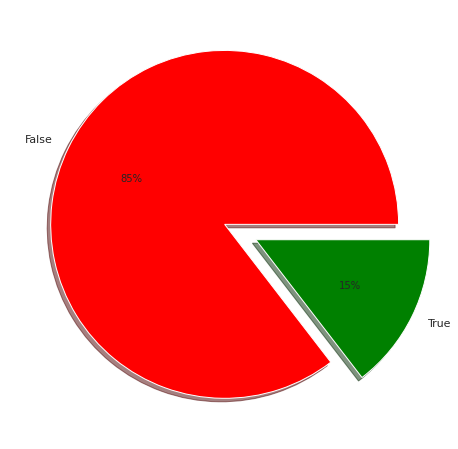

In [19]:
plt.figure(figsize=(15,8))
plt.pie(pc['state'], autopct='%.0f%%',explode=[0,0.2],labels=['False','True'],colors=['red','green'],shadow=True)
plt.show()

In [20]:
def sct(v):
  plt.figure(figsize=(15,8))
  sns.scatterplot(v,'total_day_charge',data=df,hue='churn')

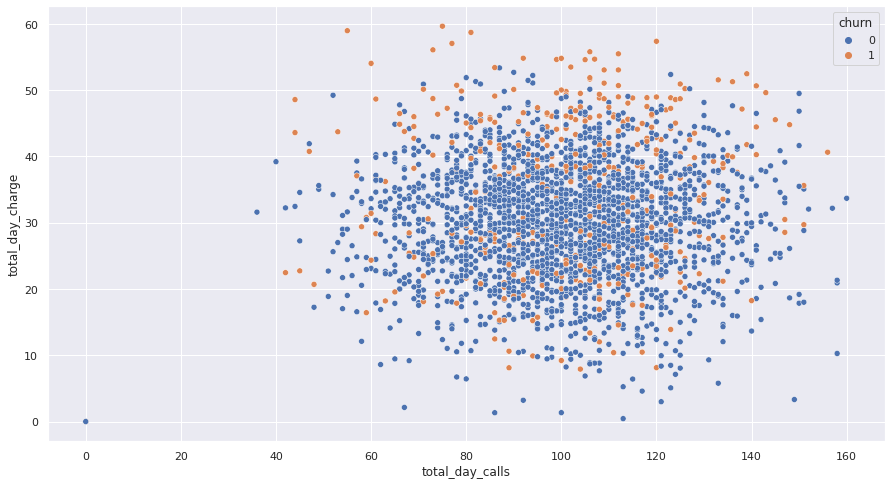

In [21]:
sct('total_day_calls')

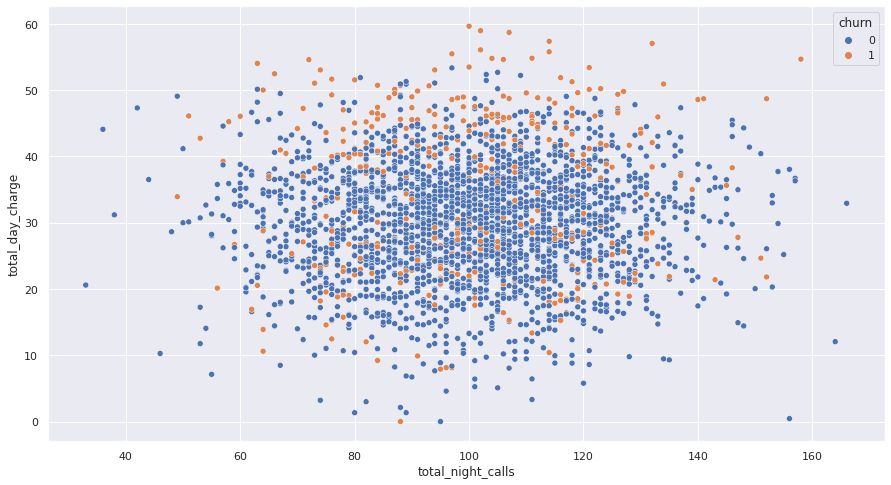

In [22]:
sct('total_night_calls')

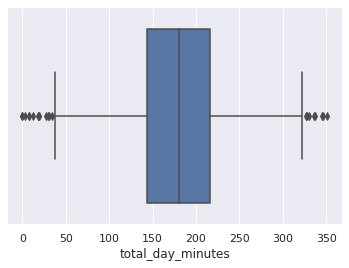

In [23]:
sns.boxplot('total_day_minutes',data=df)

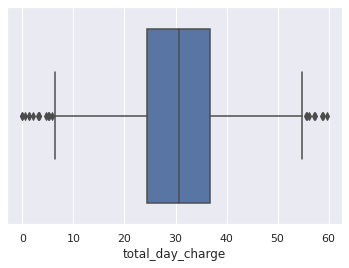

In [24]:
sns.boxplot('total_day_charge',data=df)

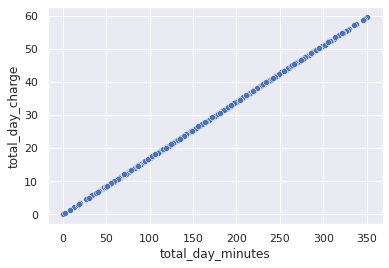

In [25]:
sns.scatterplot(df.total_day_minutes,df.total_day_charge)

# Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['state']=le.fit_transform(df['state'])

In [27]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')

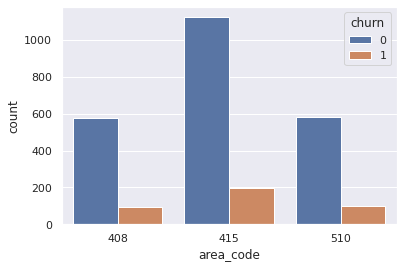

In [28]:
sns.countplot(df.area_code,hue=df.churn)

In [29]:
## almost same for pincodes so we drop

In [30]:
dv=pd.get_dummies(df[['international_plan','voice_mail_plan']],drop_first=True)
df1=pd.concat([df,dv],axis=1).drop(['international_plan','voice_mail_plan','area_code'],axis=1)
df1

state  account_length  number_vmail_messages  total_day_minutes  \
0        16             128                     25              265.1   
1        35             107                     26              161.6   
2        31             137                      0              243.4   
3        35              84                      0              299.4   
4        36              75                      0              166.7   
...     ...             ...                    ...                ...   
2661     40              79                      0              134.7   
2662      3             192                     36              156.2   
2663     49              68                      0              231.1   
2664     39              28                      0              180.8   
2665     42              74                     25              234.4   

      total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
0                 110             45.07              197.4               99   
1                 123             27.47              195.5              103   
2                 114             41.38              121.2              110   
3                  71             50.90               61.9               88   
4                 113             28.34              148.3              122   
...               ...               ...                ...              ...   
2661               98             22.90              189.7               68   
2662               77             26.55              215.5              126   
2663               57             39.29              153.4               55   
2664              109             30.74              288.8               58   
2665              113             39.85              265.9               82   

      total_eve_charge  total_night_minutes  total_night_calls  \
0                16.78                244.7                 91   
1                16.62                254.4                103   
2                10.30                162.6                104   
3                 5.26                196.9                 89   
4                12.61                186.9                121   
...                ...                  ...                ...   
2661             16.12                221.4                128   
2662             18.32                279.1                 83   
2663             13.04                191.3                123   
2664             24.55                191.9                 91   
2665             22.60                241.4                 77   

      total_night_charge  total_intl_minutes  total_intl_calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
2661                9.96                11.8                 5   
2662               12.56                 9.9                 6   
2663                8.61                 9.6                 4   
2664                8.64                14.1                 6   
2665               10.86                13.7                 4   

      total_intl_charge  customer_service_calls  churn  \
0                  2.70                       1      0   
1                  3.70                       1      0   
2                  3.29                       0      0   
3                  1.78                       2      0   
4                  2.73                       3      0   
...                 ...                     ...    ...   
2661               3.19                       2      0   
2662               2.67                       2      0   
2663               2.59                       3      0   
2664          

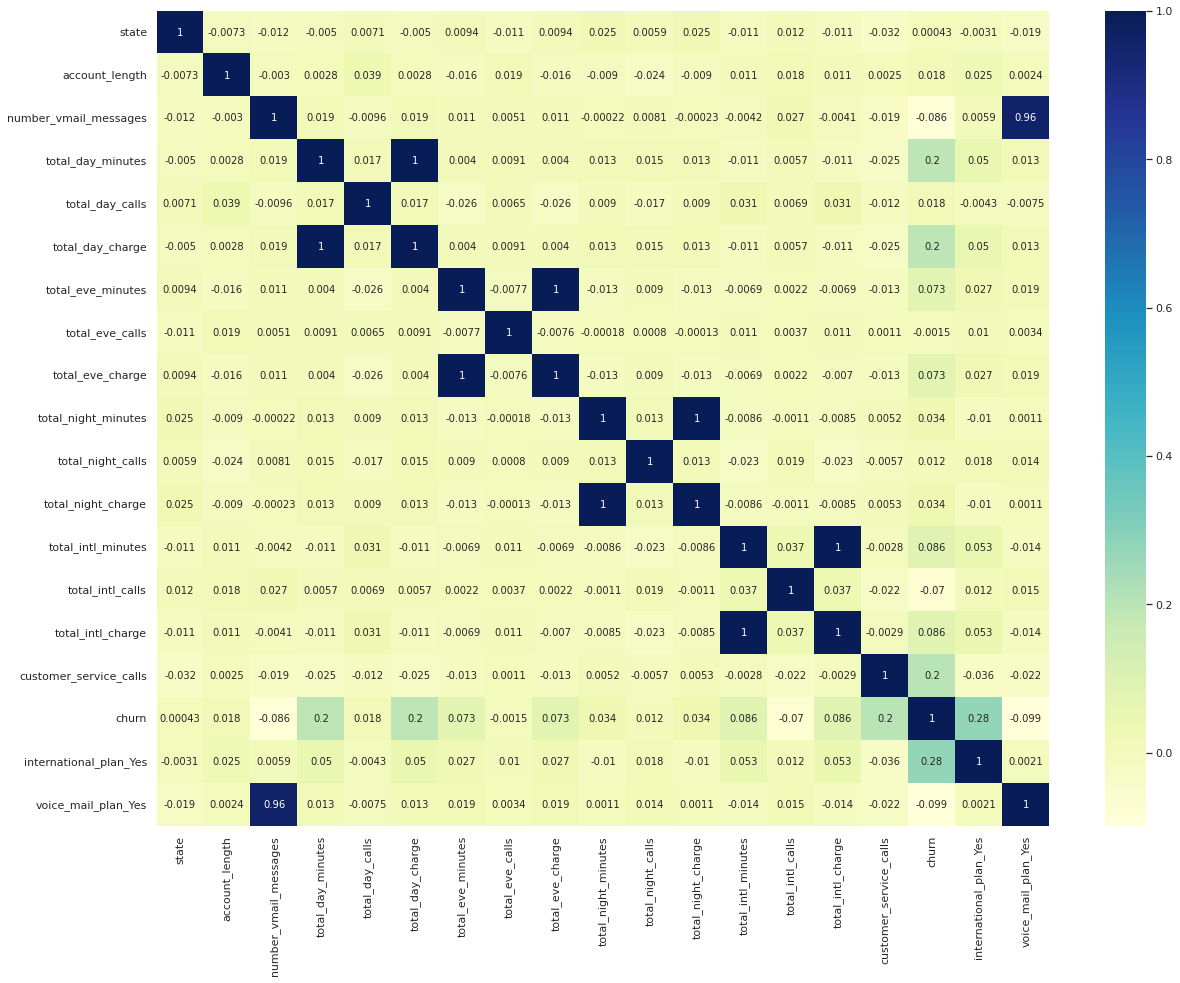

In [31]:
corrmat=df1.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corrmat,annot=True,cmap="YlGnBu")

In [32]:
df2=df1.drop(['number_vmail_messages','total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes'],axis=1)

In [33]:
df2.head()

state  account_length  total_day_calls  total_day_charge  total_eve_calls  \
0     16             128              110             45.07               99   
1     35             107              123             27.47              103   
2     31             137              114             41.38              110   
3     35              84               71             50.90               88   
4     36              75              113             28.34              122   

   total_eve_charge  total_night_calls  total_night_charge  total_intl_calls  \
0             16.78                 91               11.01                 3   
1             16.62                103               11.45                 3   
2             10.30                104                7.32                 5   
3              5.26                 89                8.86                 7   
4             12.61                121                8.41                 3   

   total_intl_charge  customer_service_calls  churn  international_plan_Yes  \
0               2.70                       1      0                       0   
1               3.70                       1      0                       0   
2               3.29                       0      0                       0   
3               1.78                       2      0                       1   
4               2.73                       3      0                       1   

   voice_mail_plan_Yes  
0                    1  
1                    1  
2                    0  
3                    0  
4                    0

In [34]:
df3=df2[['account_length', 
       'total_day_charge', 'total_eve_charge',
       'total_night_charge',
       'total_intl_charge', 'customer_service_calls', 'churn',
       'international_plan_Yes', 'voice_mail_plan_Yes']]

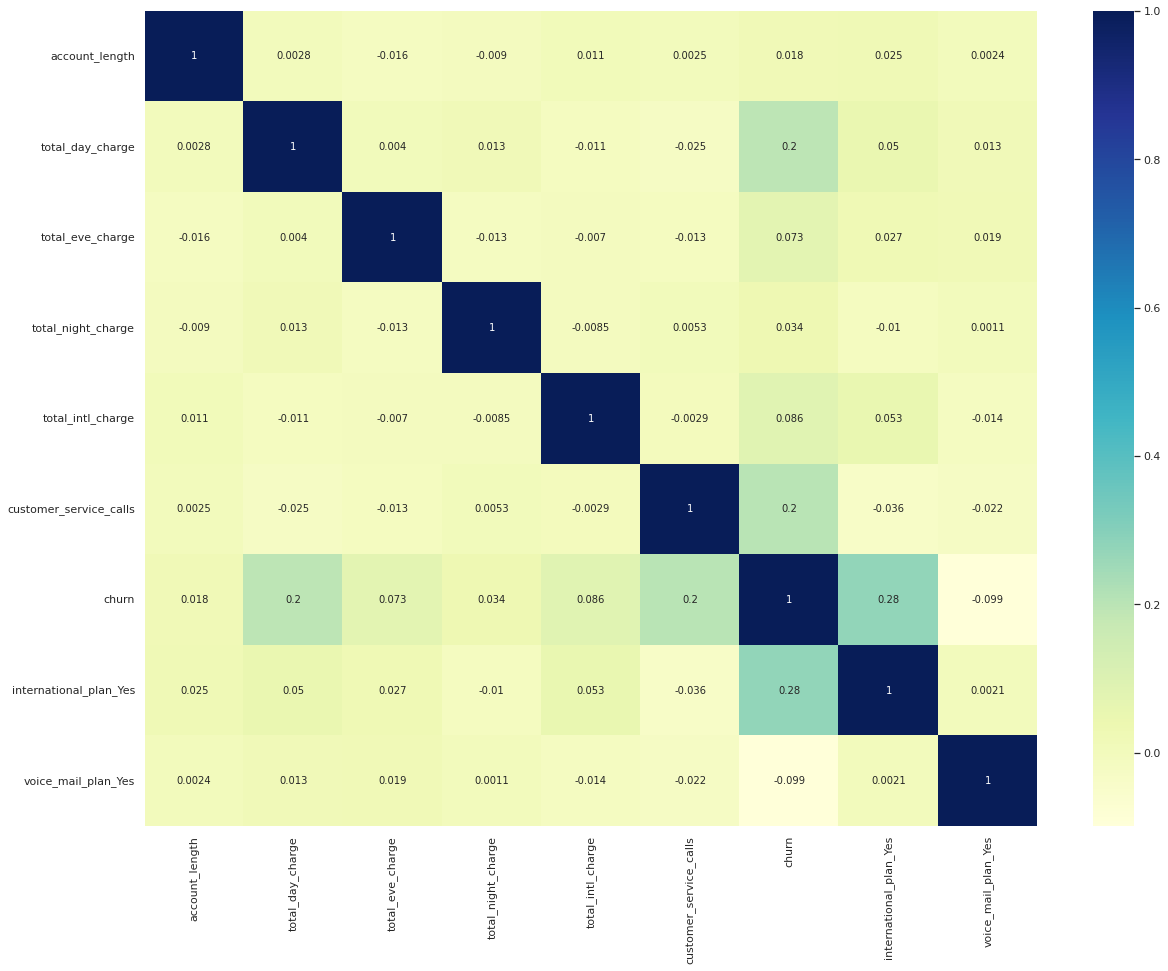

In [35]:
corrmat1=df3.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corrmat1,annot=True,cmap="YlGnBu")

## Seperate the target and feature data

In [36]:
x=df3.drop(['churn'],axis=1)
y=df3['churn']

## important parameters

In [37]:
from sklearn.feature_selection import SelectKBest,chi2
sk=SelectKBest(chi2,k=4)
sk.fit(x,y)
dfscores = pd.DataFrame(sk.scores_,columns=['score'])
dfcolumns = pd.DataFrame(x.columns,columns=['specs'])
pd.concat([dfcolumns,dfscores],axis=1).nlargest(10,'score')

specs       score
1        total_day_charge  284.061945
6  international_plan_Yes  184.492057
5  customer_service_calls  120.347409
7     voice_mail_plan_Yes   19.056720
2        total_eve_charge   15.592947
0          account_length   13.029632
4       total_intl_charge    4.060993
3      total_night_charge    1.739125

In [38]:
cs=pd.Series(x.columns)
from sklearn.tree import ExtraTreeClassifier
rg=ExtraTreeClassifier()
rg.fit(x,y)
fe=pd.DataFrame(rg.feature_importances_,columns=['imp'])
topf=pd.concat([cs,fe],axis=1).nlargest(10,'imp')
topf

0       imp
1        total_day_charge  0.249434
2        total_eve_charge  0.161563
5  customer_service_calls  0.161254
4       total_intl_charge  0.138270
3      total_night_charge  0.112794
0          account_length  0.089693
6  international_plan_Yes  0.077133
7     voice_mail_plan_Yes  0.009859

## split the data

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_test.shape

(800, 8)

# Model Bulding

## Logistic Regression


In [40]:
from sklearn.linear_model import LogisticRegression
rg=LogisticRegression()
rg.fit(x_train,y_train)
rg.score(x_test,y_test)

0.83875

In [41]:
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(10)
avg=cross_val_score(rg,x,y,cv=kf).mean()
avg

0.8585846639069583

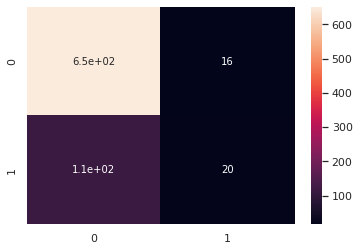

In [42]:
from sklearn.metrics import confusion_matrix,classification_report
prd=rg.predict(x_test)
cm=confusion_matrix(y_test,prd)
sns.heatmap(cm,annot=True)

In [43]:
rg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [44]:
## Hyperparameter tuning for Logistic regression

from sklearn.model_selection import RandomizedSearchCV
solver=['newton-cg','lbfgs', 'liblinear', 'sag', 'saga']
C=[10,100,400,600,800,1000]

rag={'solver': solver,
     'C': C}
rf_rag=RandomizedSearchCV(estimator = rg, 
                               param_distributions = rag, 
                               n_iter = 10, cv = 5,
                               verbose=2,
                               random_state=42)

In [45]:
rf_rag.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...........................C=1000, solver=liblinear; total time=   0.0s
[CV] END ...........................C=1000, solver=liblinear; total time=   0.0s
[CV] END ...........................C=1000, solver=liblinear; total time=   0.0s
[CV] END ...........................C=1000, solver=liblinear; total time=   0.0s
[CV] END ...........................C=1000, solver=liblinear; total time=   0.0s
[CV] END ............................C=600, solver=newton-cg; total time=   0.1s
[CV] END ............................C=600, solver=newton-cg; total time=   0.1s
[CV] END ............................C=600, solver=newton-cg; total time=   0.1s
[CV] END ............................C=600, solver=newton-cg; total time=   0.1s
[CV] END ............................C=600, solver=newton-cg; total time=   0.1s
[CV] END ..................................C=800, solver=sag; total time=   0.0s
[CV] END ..................................C=800

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [10, 100, 400, 600, 800, 1000],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, verbose=2)

In [46]:
rf_rag.best_params_

{'C': 600, 'solver': 'newton-cg'}

In [47]:
rg=LogisticRegression(C=600, solver= 'newton-cg',random_state=42)
rg.fit(x_train,y_train)
kf=KFold(10)
avg=cross_val_score(rg,x,y,cv=kf).mean()
avg

0.8608248148461041

In [48]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,accuracy_score,f1_score

## Model Function

In [49]:
def run_model(mode):
    mode.fit(x_train,y_train)
    prd = mode.predict(x_test)
    accuracy = accuracy_score(y_test, prd)
    print('Performance of',mode,'is :\n')
    print("training_score: ",mode.score(x_train,y_train))
    print("testng_score: ",mode.score(x_test,y_test))
    print("pricison_score: ",precision_score(y_test, prd))
    print("recall_score: ",recall_score(y_test, prd))
    print("Accuracy = {}".format(accuracy))
    print("f1_score: ",f1_score(y_test, prd))
    print(classification_report(y_test,prd,digits=5))
    print(confusion_matrix(y_test,prd))

In [50]:
run_model(LogisticRegression())

Performance of LogisticRegression() is :

training_score:  0.8719185423365488
testng_score:  0.83875
pricison_score:  0.5555555555555556
recall_score:  0.15037593984962405
Accuracy = 0.83875
f1_score:  0.23668639053254437
              precision    recall  f1-score   support

           0    0.85209   0.97601   0.90985       667
           1    0.55556   0.15038   0.23669       133

    accuracy                        0.83875       800
   macro avg    0.70382   0.56319   0.57327       800
weighted avg    0.80279   0.83875   0.79794       800

[[651  16]
 [113  20]]


## Cross Validation

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


In [52]:
# cols = ['model_name','f1_score']
# lst = []
# for a in model:
#     lst.append([a,f1_score(y_test,prd)])
# dfff = pd.DataFrame(lst, columns=cols)
# dfff

In [53]:
model = [LogisticRegression,DecisionTreeClassifier,KNeighborsClassifier,RandomForestClassifier,XGBRFClassifier,AdaBoostClassifier,SVC,GaussianNB]

for mod in model:
    reg = mod()
    reg = reg.fit(x_train,y_train)
    run_model(reg)

Performance of LogisticRegression() is :

training_score:  0.8719185423365488
testng_score:  0.83875
pricison_score:  0.5555555555555556
recall_score:  0.15037593984962405
Accuracy = 0.83875
f1_score:  0.23668639053254437
              precision    recall  f1-score   support

           0    0.85209   0.97601   0.90985       667
           1    0.55556   0.15038   0.23669       133

    accuracy                        0.83875       800
   macro avg    0.70382   0.56319   0.57327       800
weighted avg    0.80279   0.83875   0.79794       800

[[651  16]
 [113  20]]
Performance of DecisionTreeClassifier() is :

training_score:  1.0
testng_score:  0.89
pricison_score:  0.6890756302521008
recall_score:  0.6165413533834586
Accuracy = 0.89
f1_score:  0.6507936507936508
              precision    recall  f1-score   support

           0    0.92511   0.94453   0.93472       667
           1    0.68908   0.61654   0.65079       133

    accuracy                        0.89000       800
   macr

In [54]:
reg = RandomForestClassifier()
reg = reg.fit(x_train,y_train)
print('accuracy',reg.score(x_test,y_test))

accuracy 0.92875


In [55]:
prd=reg.predict(x_test)

In [56]:
from sklearn.metrics import r2_score,classification_report

In [57]:
print(classification_report(y_test,prd))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       667
           1       0.94      0.61      0.74       133

    accuracy                           0.93       800
   macro avg       0.93      0.80      0.85       800
weighted avg       0.93      0.93      0.92       800



In [58]:
from sklearn.model_selection import KFold,cross_val_score
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBRFClassifier()))

results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10)
    cv_result =cross_val_score(model,x_train,y_train,cv=kfold)
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

KNN 0.8756511988959808
CART 0.8885256741992984
RF 0.932462193088379
XGB 0.8949284112471968


In [59]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.92125

## Hyperparameter Tuning

In [60]:
model=RandomForestClassifier(n_estimators=100)

In [61]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


rf_random = RandomizedSearchCV(estimator = model, 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = 1)

In [62]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

### best parameter

In [63]:
rf_random.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [64]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(max_depth=25,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=1000)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.92375

In [65]:
run_model(RandomForestClassifier(max_depth=25,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=1000))

Performance of RandomForestClassifier(max_depth=25, max_features='sqrt', n_estimators=1000) is :

training_score:  1.0
testng_score:  0.925
pricison_score:  0.9101123595505618
recall_score:  0.6090225563909775
Accuracy = 0.925
f1_score:  0.7297297297297297
              precision    recall  f1-score   support

           0    0.92686   0.98801   0.95646       667
           1    0.91011   0.60902   0.72973       133

    accuracy                        0.92500       800
   macro avg    0.91849   0.79851   0.84309       800
weighted avg    0.92408   0.92500   0.91876       800

[[659   8]
 [ 52  81]]


# Clustering

In [66]:
x1=df3.drop(['churn'],axis=1)
y1=df3.churn

In [67]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=4)
x1['label']=km.fit_predict(x1)

In [68]:
from sklearn.metrics import silhouette_score
silhouette_score(x1,x1['label'])

0.392518954197388

In [69]:
wcss=[]
for f in range(1, 15):
  md=KMeans(n_clusters = f)
  md.fit(x)
  wcss.append(md.inertia_)

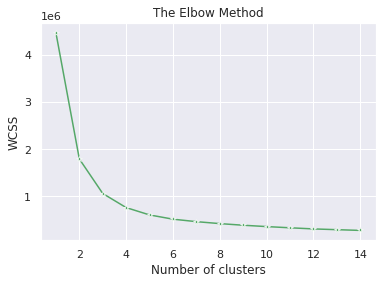

In [70]:
sns.lineplot(range(1,15),wcss,marker='*',color='g')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()